In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

In [3]:
# linarg_dir = '/n/data1/hms/dbmi/oconnor/lab/amber/msprime_simulations/small_ooa_linear_args'
linarg_dir = '/Users/ambershen/Desktop/linARG/dx_analysis/figures/3c/data'

n_mutation_list = [0, 50, 100, 500, 1000, 5000, 10000, 20000, 30000, 40000, 50000]
mut_types = ['back', 'recurrent', 'error', 'position']

df = pd.DataFrame(columns=['n_mut', 'mut_type', 'seed', 'genotypes_nnz', 'brick_graph_nnz', 'linarg_nnz'])

linarg_nnz_ratios = {}

missing_ids = []

for mut_type in mut_types:
    linarg_nnz_ratios[mut_type] = {}
    for n_mut in n_mutation_list:
        linarg_nnz_ratios[mut_type][n_mut] = []
        for seed in range(1, 101):
            
            linarg_id = f'10000_chr21-21990355-23324211_{seed}_{mut_type}_{n_mut}'            
            if not os.path.exists(f'{linarg_dir}/{linarg_id}_stats.txt'):
                missing_ids.append(linarg_id)
            else:
                genotypes_nnz, brick_graph_nnz, linarg_nnz = pd.read_csv(f'{linarg_dir}/{linarg_id}_stats.txt', sep=' ').iloc[0]
                df.loc[df.shape[0]] = [n_mut, mut_type, seed, genotypes_nnz, brick_graph_nnz, linarg_nnz]
missing_ids

['10000_chr21-21990355-23324211_3_recurrent_20000',
 '10000_chr21-21990355-23324211_5_recurrent_20000',
 '10000_chr21-21990355-23324211_6_recurrent_20000',
 '10000_chr21-21990355-23324211_13_recurrent_20000',
 '10000_chr21-21990355-23324211_3_recurrent_30000',
 '10000_chr21-21990355-23324211_5_recurrent_30000',
 '10000_chr21-21990355-23324211_6_recurrent_30000',
 '10000_chr21-21990355-23324211_9_recurrent_30000',
 '10000_chr21-21990355-23324211_13_recurrent_30000',
 '10000_chr21-21990355-23324211_40_recurrent_30000',
 '10000_chr21-21990355-23324211_3_recurrent_40000',
 '10000_chr21-21990355-23324211_4_recurrent_40000',
 '10000_chr21-21990355-23324211_5_recurrent_40000',
 '10000_chr21-21990355-23324211_6_recurrent_40000',
 '10000_chr21-21990355-23324211_9_recurrent_40000',
 '10000_chr21-21990355-23324211_16_recurrent_40000',
 '10000_chr21-21990355-23324211_79_recurrent_50000',
 '10000_chr21-21990355-23324211_1_position_20000',
 '10000_chr21-21990355-23324211_2_position_20000',
 '10000_c

In [6]:
df['linarg_ratio'] = df['genotypes_nnz'] / df['linarg_nnz']
df['brick_graph_ratio'] = df['genotypes_nnz'] / df['brick_graph_nnz']

In [7]:
mut_type_mapping = {
    'back': 'back mutation',
    'recurrent': 'recurrent mutation',
    'error': 'genotying error',
    'position': 'variant translocation'
}

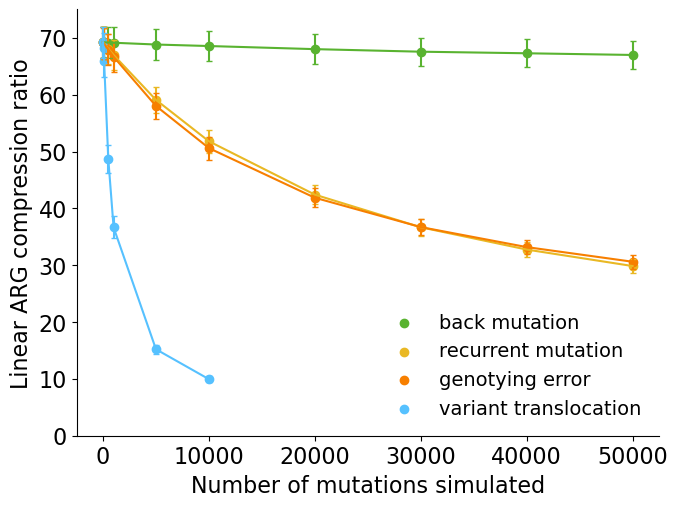

In [10]:
# plt.figure(figsize=(8, 5))

n_mutation_list = [0, 50, 100, 500, 1000, 5000, 10000, 20000, 30000, 40000, 50000]

colors = [
    '#59b330ff', # green
    '#E9B824', # yellow
    '#F77F00', # orange
    '#56C1FF', # blue
]

for i in range(len(mut_types)):
    
    df_sub = df[df.mut_type==mut_types[i]]
    means = [np.mean(df_sub[df_sub.n_mut==n_mut].linarg_ratio) for n_mut in n_mutation_list]
    stds = np.array([np.std(df_sub[df_sub.n_mut==n_mut].linarg_ratio) for n_mut in n_mutation_list])
    
    plt.scatter(n_mutation_list, means, label=mut_type_mapping[mut_types[i]], color=colors[i])
    plt.errorbar(n_mutation_list, means, yerr=stds, capsize=2, color=colors[i])
    
    # plt.scatter(np.log10(n_mutation_list), means, label=mut_type_mapping[mut_type])
    # plt.errorbar(np.log10(n_mutation_list), means, yerr=stds)
    
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
plt.legend(frameon=False, fontsize=14)
plt.tight_layout()
plt.xlabel('Number of mutations simulated', fontsize=16)
plt.ylabel('Linear ARG compression ratio', fontsize=16)
plt.tick_params(axis='both', labelsize=16)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.ylim(0, 75)
plt.show()

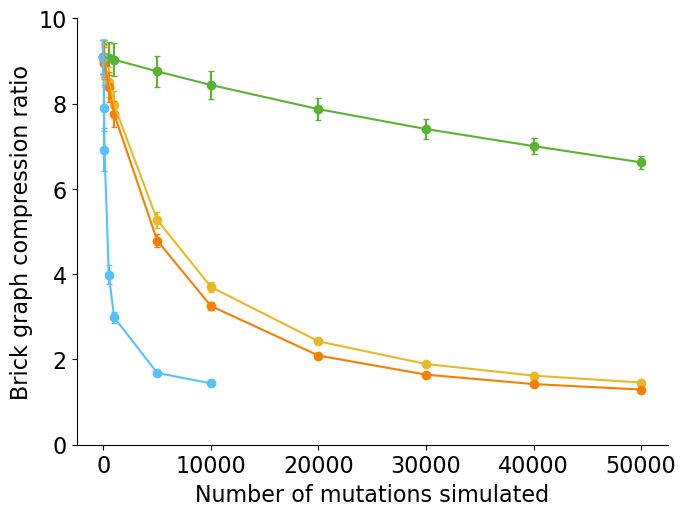

In [11]:
colors = [
    '#59b330ff', # green
    '#E9B824', # yellow
    '#F77F00', # orange
    '#56C1FF', # blue
]

for i in range(len(mut_types)):
    
    df_sub = df[df.mut_type==mut_types[i]]
    means = [np.mean(df_sub[df_sub.n_mut==n_mut].brick_graph_ratio) for n_mut in n_mutation_list]
    stds = np.array([np.std(df_sub[df_sub.n_mut==n_mut].brick_graph_ratio) for n_mut in n_mutation_list])
    
    plt.scatter(n_mutation_list, means, label=mut_type_mapping[mut_types[i]], color=colors[i])
    plt.errorbar(n_mutation_list, means, yerr=stds, capsize=2, color=colors[i])
    
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
# plt.legend(frameon=False, fontsize=14)
plt.tight_layout()
plt.xlabel('Number of mutations simulated', fontsize=16)
plt.ylabel('Brick graph compression ratio', fontsize=16)
plt.tick_params(axis='both', labelsize=16)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.ylim(0, 10)
plt.show()